# Logistic Regression using Single Layer Perceptron NN

## Import Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from ggplot import *
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
#from pandas_ml import ConfusionMatrix


## Import Data

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

#y = np.atleast_2d(y_temp).T
y.shape

#iris.to_csv('iris.csv')

(150,)

In [3]:
X.shape
#type(X)

(150, 2)

# Plot functions

In [4]:
def plot_scatter(X, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
    plt.legend();

In [5]:
def plot_withline(X,y,SPNN):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
    plt.legend()
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    probs = SPNN.classify(grid).reshape(xx1.shape)
    plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

## Logistic Regression function using SPNN

In [6]:
class LogisticRegressionSinglePerceptronModel(object):
    def __init__(self, eta, inputL, outputL):

        # Define NN structure parameters
        self.inputLayer = inputL
        self.outputLayer = outputL
        self.eta = eta
        
        # Initialise random weights based on NN structure
        # self.w = np.random.random((self.inputLayer, self.outputLayer))
        self.w = np.random.random(self.inputLayer)
        
        # Initialise with bias column
        # self.w = np.random.random((self.inputLayer+1, self.outputLayer))
        
        # Initialise Weights Learning lists to keep track of weights learning curve
        self.w_list = []
        self.w_curve = []

        # Initialise Error list to keep track of Error learning curve
        self.E = []
    
    # Function to add the bias term of ones to the input (Bias or Intercept)
    def add_bias(self, X):
        bias = np.ones((X.shape[0], 1))
        return np.concatenate((bias, X), axis=1)
    
    
    def sigmoidplus(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    # Defininig the Cost function J(θ) (or else the Error) to minimise:
    # Here using the Cross Entropy function
    def error(self,h, y):
        error = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
        #print('local error: ', error)
        self.E = np.append(self.E, error)
                       
            
    def feedforward(self,X):
        z = np.dot(X, self.w)
        h = self.sigmoid(z)
        return(h)
      
    def backprop(self,X,y,h):
        # Backpropagation for Single Perceptron using chain rule
        # dE/dw = dE/dh * dh/dz * dz/dw
        #          (1)     (2)     (3)
        #
        # Term (1) - dE/dh
        # dE/dh: Partial derivative of the cost function J(Θ) towards h 
        #        (derived manually using simple derivatives rules)
        #        (y-h) / (h*(1-h))
        #
        # Term (2) - dh/dz 
        # dh/dz: Derivative of Activation function (Sigmoid here)
        #        h*(1-h)
        # 
        # Term (3) - dz/dw
        # dz/dw: Input X
        # 
        # Final Result: dE/dw = (y-h)*X
        self.delta_E_w = np.dot(X.T,h-y) / self.outputLayer
        
        # Store All weights throughout learning
        self.w_list.append(self.w)
        
        # Adjust weights
        self.w = self.w - eta * self.delta_E_w
        
    def returnWeights(self):
        return self.w
        
    def train(self,X,y):
        for epoch in range(epochs):
            # Forward pass
            h = self.feedforward(X)
            
            # Backpropagation - Calculate Weight adjustments and update weights
            self.backprop(X,y,h)
            
            # Calculate error based on the Cross Entropy Loss function
            self.error(h, y)
               
    def plot(self):
        fig = plt.figure()
        plt.plot(self.E)
        
        fig.suptitle('Error', fontsize=16)
        plt.xlabel('Epochs', fontsize=12)
        plt.ylabel('Error achieved', fontsize=12)
        
        plt.show()
    
    def predict(self, X):
        # Forward pass
        pred = self.feedforward(X)
        return pred
    
    def classify(self, y):
        return self.predict(y).round()
        

In [7]:
X.shape
#X.shape[1]

(150, 2)

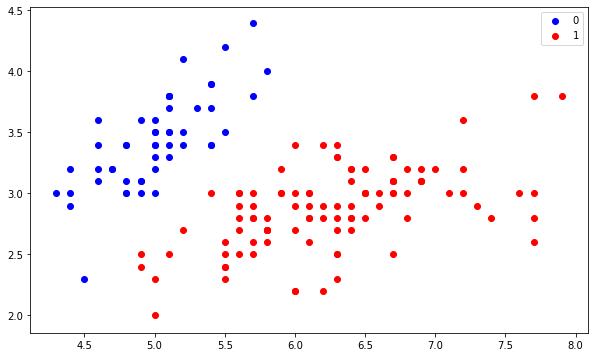

In [8]:
plot_scatter(X,y)

In [9]:
y.size

150

In [10]:
y.shape
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Define Parameters

In [11]:
# Learning Rate
eta = 0.0005

# Number of epochs for learning
epochs = 3000

# Input layer
inputLayer = X.shape[1]

# Output Layer
outputLayer = 1
#y.shape[1]

## NN training

Wall time: 281 ms


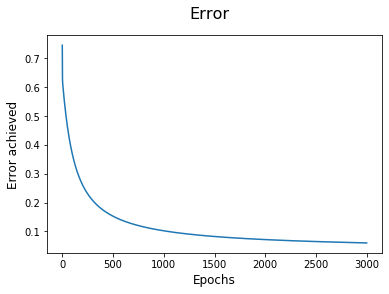

Minimum Error achieved: 0.06019462951488751


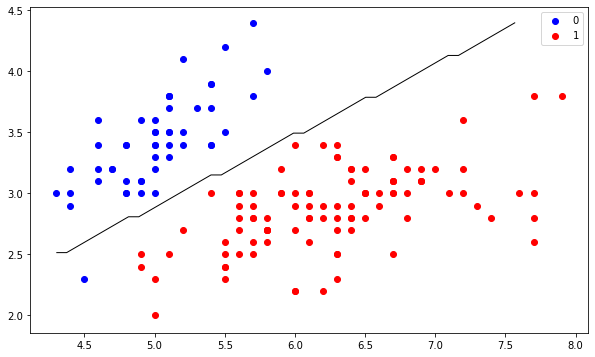

In [12]:
# Initiate Single Perceptron NN
SPNN = LogisticRegressionSinglePerceptronModel(eta, inputLayer, outputLayer)

# Train SPNN for Linear Regression Model
#%time SPNN.train(X_train, y_train)
%time SPNN.train(X, y)

# Plot Error
SPNN.plot()

# Predict output based on test set
pred = SPNN.predict(X)

# Generate classified output
pred2 = SPNN.classify(X)

# Assess Model accuracy
print("Minimum Error achieved:", min(SPNN.E)) 

# SPNN weights
SPNN.w

# Visualisation prediction line
plot_withline(X,y,SPNN)
# Plot Predictions
# plt.plot(X,pred)

In [13]:
[y, pred2]

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 